RESNET50

In [1]:
#import modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import cv2
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

Path for normal, covid-19, TB
Grab all image files for every class

In [2]:
#define paths
normalpath = 'C:\\Users\\Zul\\Desktop\\tryfyp\\datasetxx\\normal'
covidpath = 'C:\\Users\\Zul\\Desktop\\tryfyp\\datasetxx\\covid'
tbpath = 'C:\\Users\\Zul\\Desktop\\tryfyp\\datasetxx\\tb'

# Use glob to grab images from path .jpg or jpeg
normal_files = glob(normalpath + '/*')
covid_files = glob(covidpath + '/*')
tb_files = glob(tbpath + '/*')

In [3]:
#Store all images into a variable
allfiles = normal_files + covid_files + tb_files

In [4]:
print('There are %d normal cases.' % len(normal_files))
print('There are %d covid positive cases.' % len(covid_files))
print('There are %d tuberculosis positive cases.' % len(tb_files))

There are 30 normal cases.
There are 30 covid positive cases.
There are 30 tuberculosis positive cases.


In [ ]:
#show xray normal
f = plt.figure(figsize=(15,7))
f.suptitle('NORMAL',fontsize=20)
f.subplots_adjust(top=2.35)
for i in range(3):
    sp = f.add_subplot(1,3,i+1)
    img = cv2.imread(normal_files[i])
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
    plt.imshow(img_gray)
    plt.gray()
plt.show()

In [ ]:
#show xray covid
f = plt.figure(figsize=(15,7))
f.suptitle('COVID19',fontsize=20)
f.subplots_adjust(top=2.35)
for i in range(3):
    sp = f.add_subplot(1,3,i+1)
    img = cv2.imread(covid_files[i])
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
    plt.imshow(img_gray)
    plt.gray()
plt.show()

In [ ]:
#show xray tb
f = plt.figure(figsize=(15,7))
f.suptitle('TB',fontsize=20)
f.subplots_adjust(top=2.35)
for i in range(3):
    sp = f.add_subplot(1,3,i+1)
    img = cv2.imread(tb_files[i])
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
    plt.imshow(img_gray)
    plt.gray()
plt.show()

Preparing labels (0=NORMAL, 1=COVID19, 2=TB)

In [5]:
# Preparing Labels

import cv2

data = []
labels = []


for i in range(len(normal_files)):
  image = cv2.imread(normal_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #image = cv2.resize(image,(180,180))
  image = cv2.resize(image,(224,224))
  data.append(image)
  labels.append(0) #atau mungkin kena letak num like 0

for i in range(len(covid_files)):
  image = cv2.imread(covid_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #image = cv2.resize(image,(180,180))
  image = cv2.resize(image,(224,224))
  data.append(image)
  labels.append(1)

for i in range(len(tb_files)):
  image = cv2.imread(tb_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #image = cv2.resize(image,(180,180))
  image = cv2.resize(image,(224,224))
  data.append(image)
  labels.append(2)

List of images for all classes

In [ ]:
images = []
for i in range(len(normal_files)):
    normfile = normal_files[i]
    images.append(normfile)
for i in range(len(covid_files)):
    covfile = covid_files[i]
    images.append(covid_files)
for i in range(len(tb_files)):
    tbfile = tb_files[i]
    images.append(tb_files)

Create dataframe containing file name with labels of Xray_class

In [6]:
img_df = pd.DataFrame({'Image_name':allfiles, 'Xray_class': labels})

In [7]:
img_df.head()

,Image_name,Xray_class
0,C:\Users\Zul\Desktop\tryfyp\datasetxx\normal\N...,0
1,C:\Users\Zul\Desktop\tryfyp\datasetxx\normal\N...,0
2,C:\Users\Zul\Desktop\tryfyp\datasetxx\normal\N...,0
3,C:\Users\Zul\Desktop\tryfyp\datasetxx\normal\N...,0
4,C:\Users\Zul\Desktop\tryfyp\datasetxx\normal\N...,0


0:Normal, 1:Covid19, 2:TB


<AxesSubplot: xlabel='Xray_class', ylabel='count'>

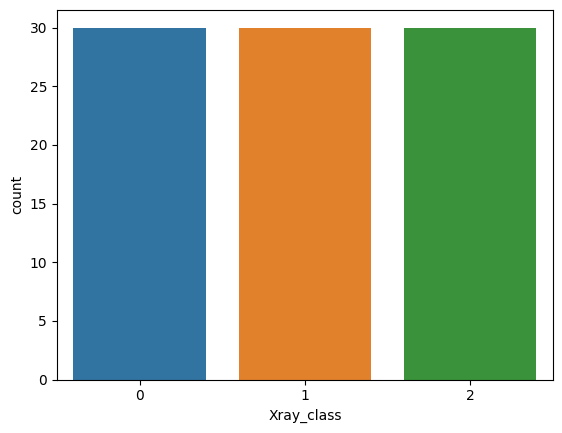

In [8]:
print ("0:Normal, 1:Covid19, 2:TB")
sns.countplot(x='Xray_class', data=img_df)

In [9]:
#Import module for ResNet50
import numpy as np
from keras.applications import ResNet50, InceptionV3, InceptionResNetV2
from keras.preprocessing import image
from keras.models import Model
from keras.applications.resnet import preprocess_input
from keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout

Create model ResNet50

In [10]:
base_model = ResNet50(weights="imagenet")
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

Use pretrained ResNet50 for feature extraction

In [12]:
from keras.utils import load_img
from keras.utils import img_to_array

In [13]:
# Output of the layer before the final classification layer: shape (1, 2048)

image_size = 224
features_array = np.zeros((90,2048))

for i, img_path in enumerate(allfiles):
    img = load_img(img_path, target_size=(image_size, image_size))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    X = preprocess_input(x)
    features = model.predict(X)
    features = features.reshape(2048,)
    features_array[i,:] = features

1/1 [==============================] - 0s 217ms/step


In [14]:
features_array.shape

(90, 2048)

In [15]:
img_df.head()

,Image_name,Xray_class
0,C:\Users\Zul\Desktop\tryfyp\datasetxx\normal\N...,0
1,C:\Users\Zul\Desktop\tryfyp\datasetxx\normal\N...,0
2,C:\Users\Zul\Desktop\tryfyp\datasetxx\normal\N...,0
3,C:\Users\Zul\Desktop\tryfyp\datasetxx\normal\N...,0
4,C:\Users\Zul\Desktop\tryfyp\datasetxx\normal\N...,0


Create dataframe containing features extracted, file name and labels of Xray_class

In [16]:
df = pd.DataFrame(features_array)
df['Image_name'] = img_df.Image_name
df['Xray_class'] = img_df.Xray_class
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2040,2041,2042,2043,2044,2045,2046,2047,Image_name,Xray_class
0,3.168583,0.511497,0.085425,0.096594,0.307481,0.285342,0.186923,0.362853,0.000000,0.016389,...,0.275449,0.468250,0.585258,1.316513,0.360540,0.010702,0.199372,0.076564,C:\Users\Zul\Desktop\tryfyp\datasetxx\normal\N...,0
1,2.283913,1.799597,0.015848,0.595792,0.762140,0.017285,0.121611,0.519183,0.032349,0.001033,...,0.385702,0.125493,0.696037,3.691107,0.975750,0.002359,0.191889,0.414197,C:\Users\Zul\Desktop\tryfyp\datasetxx\normal\N...,0
2,4.060345,0.865386,0.074533,0.820280,1.175468,0.219563,0.382097,0.164816,0.107059,0.081656,...,1.094684,0.095010,0.099476,3.544813,0.623507,0.011986,0.443211,2.273932,C:\Users\Zul\Desktop\tryfyp\datasetxx\normal\N...,0
3,1.449852,0.705276,0.000000,0.484151,0.107090,0.221702,0.301185,0.766134,0.000000,0.000000,...,0.429471,0.309629,0.394181,2.044616,1.721472,0.010996,0.264822,0.214292,C:\Users\Zul\Desktop\tryfyp\datasetxx\normal\N...,0
4,3.024693,0.769820,0.000000,0.800498,0.171121,0.124887,0.961985,0.375350,0.013630,0.080665,...,0.553257,0.120845,0.280557,2.016607,0.700168,0.000000,0.288619,0.982862,C:\Users\Zul\Desktop\tryfyp\datasetxx\normal\N...,0


In [17]:
#save dataframeextracted features into CSV FILE
df.to_csv('ftResnet.csv', index=False)

In [ ]:
#save extracted features into EXCEL FILE
df.to_excel("ft_Resnet.xlsx")  

In [18]:
#train_test_split method of scikit learn library
from sklearn.model_selection import train_test_split
x_in = df.drop(['Image_name', 'Xray_class'], axis=1)
y_out = df.Xray_class
xtrain, xtest, ytrain, ytest = train_test_split(x_in, y_out, test_size=0.2, shuffle=True)

KNN without CV

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [21]:
pred_knn = knn.predict(xtest)

In [22]:
print(accuracy_score(ytest, pred_knn))

0.8333333333333334


Confusion Matrix KNN

Text(0.5, 1.0, 'Confusion Matrix KNN')

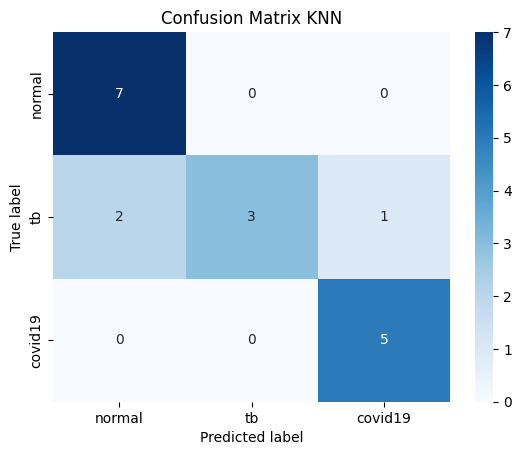

In [23]:
cm = confusion_matrix(ytest, pred_knn)
classes=['normal', 'tb', 'covid19']
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes,cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix KNN')

Classification report KNN

In [24]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred_knn))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91         5

    accuracy                           0.83        18
   macro avg       0.87      0.83      0.82        18
weighted avg       0.87      0.83      0.82        18



In [25]:
#plot roc multiclass
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from keras.utils import to_categorical

In [26]:
# Binarize the output
PRED = to_categorical(pred_knn, num_classes=3)
y = label_binarize(y_out, classes=[0,1,2])
n_classes = y.shape[1]

Y_test = to_categorical(ytest, num_classes=3)

False positive rate and True positive rate for AUC

In [27]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
       fpr[i], tpr[i], _ = roc_curve(Y_test[:,i], PRED[:,i])
       roc_auc[i] = auc(fpr[i], tpr[i])

ROC + AUC (KNN)

C:\Users\Zul\AppData\Local\Temp\ipykernel_15864\2215385453.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--',linestyle='--')


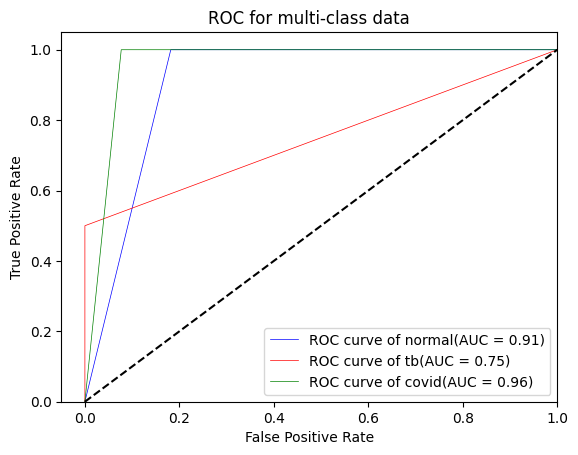

In [28]:
colors = ['blue', 'red', 'green']
cls = {0:'normal', 1:'tb', 2:'covid'}
for i, color ,c in zip(range(n_classes), colors, cls.values()):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.5,
             label='ROC curve of '+c+ '(AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class data')
plt.legend(loc="lower right")
plt.show()

KNN with CV

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_auc_score

In [ ]:
x_ar = x_in.to_numpy()
y_ar = y_out.to_numpy()

In [ ]:
# 5 fold cv

kf5_knn = KFold(n_splits = 5)

scores_knn = cross_val_score(knn, x_ar, y_ar, cv = kf5_knn)

print("Cross Validation Scores: ", scores_knn)
print("Average CV Score: ", scores_knn.mean())
print("Number of CV Scores used in Average: ", len(scores_knn))

In [ ]:
# 10 fold cv

kf10_knn = KFold(n_splits = 10)

scores2_knn = cross_val_score(knn, x_ar, y_ar, cv = kf10_knn)

print("Cross Validation Scores: ", scores2_knn)
print("Average CV Score: ", scores2_knn.mean())
print("Number of CV Scores used in Average: ", len(scores2_knn))

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 4, random_state = 0)
rfc.fit(xtrain, ytrain)

In [ ]:
preds_rf=rfc.predict(xtest)

In [ ]:
print(accuracy_score(ytest, preds_rf))

Confusion Matrix RF

In [ ]:
cm = confusion_matrix(ytest, preds_rf)
classes=['normal', 'tb', 'covid19']
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes,cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix RF')

Classification report RF

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, preds_rf))

In [ ]:
# Binarize the output
PRED = to_categorical(preds_rf, num_classes=3)
y = label_binarize(y_out, classes=[0,1,2])
n_classes = y.shape[1]

Y_test = to_categorical(ytest, num_classes=3)

False positive rate and True positive rate for AUC

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
       fpr[i], tpr[i], _ = roc_curve(Y_test[:,i], PRED[:,i])
       roc_auc[i] = auc(fpr[i], tpr[i])

ROC + AUC (RF)

In [ ]:
colors = ['blue', 'red', 'green']
cls = {0:'normal', 1:'tb', 2:'covid'}
for i, color ,c in zip(range(n_classes), colors, cls.values()):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.5,
             label='ROC curve of '+c+ '(AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class data')
plt.legend(loc="lower right")
plt.show()

RF with CV

In [ ]:
# 5 fold cv

kf5_RF = KFold(n_splits = 5)

scores_RF = cross_val_score(rfc, x_ar, y_ar, cv = kf5_RF)

print("Cross Validation Scores: ", scores_RF)
print("Average CV Score: ", scores_RF.mean())
print("Number of CV Scores used in Average: ", len(scores_RF))

In [ ]:
# 10 fold cv

kf10_RF = KFold(n_splits = 10)

scores2_RF = cross_val_score(rfc, x_ar, y_ar, cv = kf10_RF)

print("Cross Validation Scores: ", scores2_RF)
print("Average CV Score: ", scores2_RF.mean())
print("Number of CV Scores used in Average: ", len(scores2_RF))

ANN

In [ ]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(solver='lbfgs',alpha=1e-5, random_state=0)
ann.fit(xtrain, ytrain)

In [ ]:
preds_ann=ann.predict(xtest)

In [ ]:
print(accuracy_score(ytest, preds_ann))

Confusion matrix ANN

In [ ]:
cm = confusion_matrix(ytest, preds_ann)
classes=['normal', 'tb', 'covid19']
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes,cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix ANN')

In [ ]:
print(classification_report(ytest, preds_ann))

In [ ]:
# Binarize the output
PRED = to_categorical(preds_ann, num_classes=3)
y = label_binarize(y_out, classes=[0,1,2])
n_classes = y.shape[1]

Y_test = to_categorical(ytest, num_classes=3)

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
       fpr[i], tpr[i], _ = roc_curve(Y_test[:,i], PRED[:,i])
       roc_auc[i] = auc(fpr[i], tpr[i])

ROC + AUC (KNN)

In [ ]:
colors = ['blue', 'red', 'green']
cls = {0:'normal', 1:'tb', 2:'covid'}
for i, color ,c in zip(range(n_classes), colors, cls.values()):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.5,
             label='ROC curve of '+c+ '(AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class data')
plt.legend(loc="lower right")
plt.show()

ANN with CV

In [ ]:
# 5 fold cv

kf5_ann= KFold(n_splits = 5)

scores_ann = cross_val_score(ann, x_ar, y_ar, cv = kf5_ann)

print("Cross Validation Scores: ", scores_ann)
print("Average CV Score: ", scores_ann.mean())
print("Number of CV Scores used in Average: ", len(scores_ann))

In [ ]:
# 10 fold cv

kf10_ann = KFold(n_splits = 10)

scores2_ann = cross_val_score(ann, x_ar, y_ar, cv = kf10_ann)

print("Cross Validation Scores: ", scores2_ann)
print("Average CV Score: ", scores2_ann.mean())
print("Number of CV Scores used in Average: ", len(scores2_ann))

SVM w/o cross-validation

In [ ]:
from sklearn.svm import SVC
#SVM w/o cross-validation

svc = SVC(gamma = 'auto', random_state = 0)


In [ ]:
svc.fit(xtrain, ytrain)


In [ ]:
pred_svc = svc.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(ytest, pred_svc))

In [ ]:
cm = confusion_matrix(ytest, pred_svc)
classes=['normal', 'tb', 'covid19']
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes,cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix SVC')

Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred_svc))

In [ ]:
# Binarize the output
PRED = to_categorical(pred_svc, num_classes=3)
y = label_binarize(y_out, classes=[0,1,2])
n_classes = y.shape[1]

In [ ]:
Y_test = to_categorical(ytest, num_classes=3)

False positive rate and True positive rate for AUC

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
       fpr[i], tpr[i], _ = roc_curve(Y_test[:,i], PRED[:,i])
       roc_auc[i] = auc(fpr[i], tpr[i])

ROC

In [ ]:
colors = ['blue', 'red', 'green']
cls = {0:'normal', 1:'tb', 2:'covid'}
for i, color ,c in zip(range(n_classes), colors, cls.values()):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.5,
             label='ROC curve of '+c+ '(AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#df to array
xtest_ar = xtest.to_numpy()
ytest_ar = ytest.to_numpy()

In [ ]:
L = 3
W = 3
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0, 9):
    img = cv2.imread(allfiles[i])
    axes[i].imshow(img)
    axes[i].set_title(f"Prediction Class = {preds[i]:0.1f}\n Original Class = {ytest_ar[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

SVM with cross-validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_auc_score

In [ ]:
x_ar = x_in.to_numpy()

In [ ]:
y_ar = y_out.to_numpy()

In [ ]:
k_folds = KFold(n_splits = 5)

scores_svc = cross_val_score(svc, x_ar, y_ar, cv = k_folds)

print("Cross Validation Scores: ", scores_svc)
print("Average CV Score: ", scores_svc.mean())
print("Number of CV Scores used in Average: ", len(scores_svc))

In [ ]:
k_folds = KFold(n_splits = 10)

scores = cross_val_score(svc, x_ar, y_ar, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))